# [Reacher](https://gymnasium.farama.org/environments/mujoco/reacher/).
En este proeycto aplicaremos aprendisaje por refuerzo (RL) para llevar a cabo el problema del aprendisaje mediante interacciones del [Reacher](https://gymnasium.farama.org/environments/mujoco/reacher/). y el uso de un *agente* que ira aprendiendo del entorno mediante la interaccion con este recibiendo recompensas como retroalimentacion (negativas o positivas)
-aplicaremos la tasa de descuento llamada gama (debe de estar enntre 0 y 1) tentativamente 0,95 y 0,99 a mallor gama, menor sera el descuento
para ver la eficiencia del algoritmo graficaremos
la suma de las recompensas durante el episodio (y)
episodio (x)

#### ¿Cual algoritmo elegir para el Reacher?
como el reacher-v4 es un entorno continuo es decir que el brazo toma valores dentro de un rango continuo para hacer el torque,
intentaremos aplicar un Model-free, tentativamente el Deep Deterministic Policy Gradient (DDPG) ya que funciona bien en espacios continuos pero DQN o SAC tambien son buenas opciones,
¿se puede usar stable-baselines3?

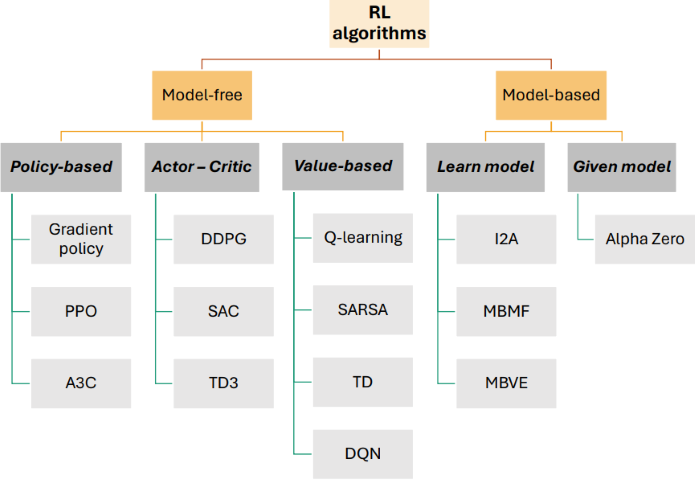

#### ¿Cuales podemos utilizar? (BORRADOR)
// ignorar
- Proceso de decisión de Markov (MDP)
Estado (S): posisiones de los brazos, posision del objetivo, velocidades angulares y vector de posicion
Accion (A): Torques
Reward (R): segun la distancia objetivo y la magnitud de las acciones 

- Deep Deterministic Policy Gradient (DDPG)


In [21]:
import gymnasium as gym
import numpy as np
from stable_baselines3 import DDPG
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.noise import NormalActionNoise
import imageio
from IPython.display import Image

env = DummyVecEnv([lambda: gym.make('Reacher-v4', render_mode='rgb_array')])
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))
model = DDPG('MlpPolicy', env, action_noise=action_noise, verbose=1)


Using cpu device


# DDPG

In [33]:
# Crear el entorno

# Entrenar el modelo
model.learn(total_timesteps=30000)

# Evaluar el modelo
obs = env.reset()
frames = []
for _ in range(50):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, infos = env.step(action)
    frames.append(env.render(mode='rgb_array'))

# Guardar la animación
imageio.mimsave("reacher_ddpg.gif", frames, fps=30)


---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 159      |
|    time_elapsed    | 1        |
|    total_timesteps | 200      |
| train/             |          |
|    actor_loss      | 3.43     |
|    critic_loss     | 0.00369  |
|    learning_rate   | 0.001    |
|    n_updates       | 14699    |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 115      |
|    time_elapsed    | 3        |
|    total_timesteps | 400      |
| train/             |          |
|    actor_loss      | 3.61     |
|    critic_loss     | 0.00324  |
|    learning_rate   | 0.001    |
|    n_updates       | 14899    |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 12       |
|    fps             | 108      |
|    time_elapsed    | 5        |
|    total_tim

# Vizualizar

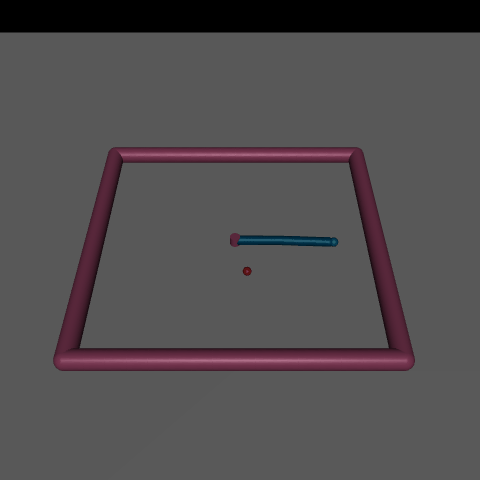

In [50]:

Image(filename="reacher_ddpg.gif")